In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels
import wrangle
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
import explore


df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

Classwork

For df1:
Take a look at the data in df1.
Does x increase from time one to time two? - No
Visualize the relationship between x and time. -Complete with a bar chart
Run a statistical test to further examine the relationship between these features.

For df2:
Take a look at the data in df2.
Visualize the relationship between x and y.
How would you describe the relationship between x and y?
Run a statistical test to examine the relationship between x and y.

For df3:
Take a look at the data in df3
Which surgeon has the higher success rate?
If you had to have heart bypass surgery, which surgeon would you go to?
For df1 and df2, what happens to the relationships if you take into account the group feature?

In [2]:
df1.head(20)

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one
5,a,6.177862,one
6,b,10.197019,one
7,a,6.031114,one
8,a,3.915432,one
9,a,3.636528,one


In [3]:
df1.time.value_counts()

two    100
one    100
Name: time, dtype: int64

<BarContainer object of 200 artists>

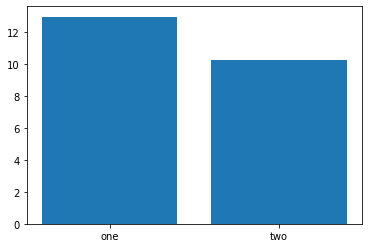

In [4]:
plt.bar(df1.time,df1.x)

############################   Exercises  #################################### 

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [5]:
# Use our function from wrangle to acquire and prepare our data.
df = wrangle.get_zillow_data()

/usr/local/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


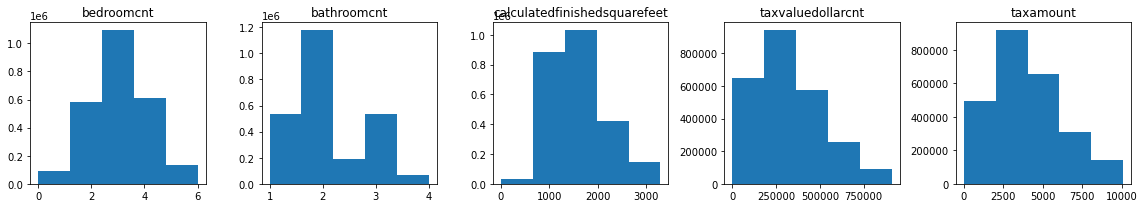

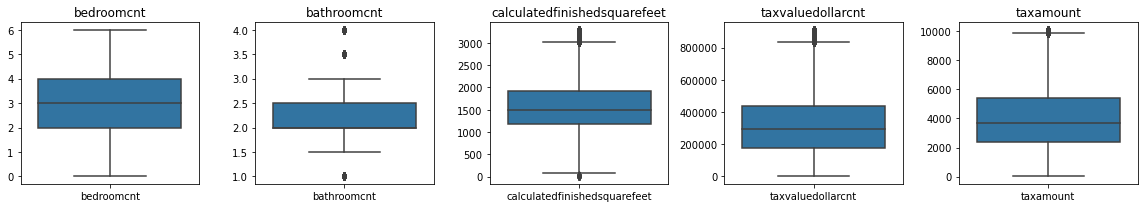

/Users/sarahwoods/codeup-data-science/regression-exercises/wrangle.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['yearbuilt']] = imputer.transform(train[['yearbuilt']])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/sarahwoods/codeup-data-science/regression-exercises/wrangle.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [7]:
train, validate, test = wrangle.prepare_zillow(df)

In [8]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
359618,2.0,2.0,1271.0,337583.0,1982.0,6037.0
2364888,4.0,3.0,2671.0,215041.0,1964.0,6037.0
261280,4.0,3.0,2076.0,386870.0,1939.0,6037.0
1758266,1.0,1.0,682.0,176839.0,1974.0,6059.0
798177,3.0,1.0,1178.0,277027.0,1950.0,6037.0


2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [ ]:
explore.create_pairplots(df.sample(1000))

In [11]:
def create_pairplots(df):
    sns.pairplot(df.drop(columns='fips').sample(100), kind='reg')
    plt.show()

In [12]:
train.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
fips                            0
dtype: int64

In [13]:
#def get_pairplot():
  #sns.pairplot(train, kind='reg')

3. Write a function named bathroom_to_bedroom that accepts your zillow dataframe and returns a dataframe with a new feature bath_bed_ratio, in complete rooms.

In [14]:
explore.bathroom_to_bedroom(train)

359618     1.000000
2364888    0.750000
261280     0.750000
1758266    1.000000
798177     0.333333
             ...   
2143105    1.000000
2035345    1.500000
1785774    0.750000
1943326    1.000000
1649783    0.750000
Length: 1409076, dtype: float64

In [15]:
def bathroom_to_bedroom(df):
    bath_bed_ratio = df['bath_bed_ratio'] = df['bathroomcnt']/ df['bedroomcnt']
    return bath_bed_ratio
bathroom_to_bedroom(train)

359618     1.000000
2364888    0.750000
261280     0.750000
1758266    1.000000
798177     0.333333
             ...   
2143105    1.000000
2035345    1.500000
1785774    0.750000
1943326    1.000000
1649783    0.750000
Length: 1409076, dtype: float64

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [16]:
train.corr()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,bath_bed_ratio
bedroomcnt,1.000000,0.530942,0.658482,0.184286,0.044911,-0.408601
bathroomcnt,0.530942,1.000000,0.706343,0.338852,0.412206,0.495699
calculatedfinishedsquarefeet,0.658482,0.706343,1.000000,0.401241,0.215726,0.069823
taxvaluedollarcnt,0.184286,0.338852,0.401241,1.000000,0.228786,0.159042
yearbuilt,0.044911,0.412206,0.215726,0.228786,1.000000,0.398014
bath_bed_ratio,-0.408601,0.495699,0.069823,0.159042,0.398014,1.000000


In [ ]:
#do a groupby like in the lesson example

In [ ]:
#use example in lesson to make categorical variables

In [19]:
cats = train['calculatedfinishedsquarefeet'] = np.where(train.calculatedfinishedsquarefeet > train.calculatedfinishedsquarefeet.median(), 'large home', 'small home')
cont = train.drop(columns=)

In [17]:
explore.plot_categorical_and_continuous_vars(cats, vars, train)

NameError: name 'cats' is not defined

In [18]:
def plot_categorical_and_continuous_vars(cats, vars, train()):
    cats = ['fips']
    vars = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt']
    # return a heatmap
    correlation_table = df.corr()
        
    # sns.heatmap(correlation_table,annot=True, vmin=-1, vmax=1)
    sns.heatmap(correlation_table, cmap='Blues', annot=True,vmin=-1, vmax=1)
    plt.show()
    #make plot 2
    df.bathroomcnt.plot.hist()
    plt.show()
    #make plot 3
    df.bedroomcnt.plot.hist()
    plt.show()
    return cats, vars, df
    


NameError: name 'correlation_table' is not defined

In [ ]:
figure(figsize=(16, 6), dpi=80)
plot_categorical_and_continuous_vars(cats, vars, train)

In [ ]:
# Make the plots
correlation_table = train.corr()
# sns.heatmap(correlation_table, cmap='Blues', annot=True, vmin=0, vmax=1)
sns.heatmap(correlation_table, cmap='Blues', annot=True)

In [ ]:
#make plot 2
train.bathroomcnt.plot.hist()

In [ ]:
#make plot 3
train.bedroomcnt.plot.hist()

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Explore your dataset with any other visualizations you think will be helpful.

In [ ]:
figure(figsize=(16, 6), dpi=80)
sns.histplot(data=train, x='fips',bins=7,binwidth=1, hue='bedroomcnt')

In [ ]:
figure(figsize=(16, 6), dpi=80)
sns.histplot(data=train, x='fips', hue='bathroomcnt')

In [ ]:
figure(figsize=(16, 6), dpi=80)
sns.histplot(data=train, x='fips', hue='taxvaluedollarcnt')

In [ ]:
sns.histplot(data=train, x='fips',bins=1000, hue='calculatedfinishedsquarefeet')
#not a great visual for these variables

In [ ]:
sns.histplot(data=train, x='fips', hue='yearbuilt')
#not a great visual for these variables

In [ ]:
pd.crosstab(train.bedroomcnt, train.fips)

In [ ]:
pd.crosstab(train.bathroomcnt, train.fips)

In [ ]:
pd.crosstab(train.calculatedfinishedsquarefeet, train.fips)

In [ ]:
########################### EXERCISES II CHALLENGE #################################

Your goal is to predict the values of single unit properties using the observations from 2017

2. Come up with some initial hypotheses based on your goal of predicting property value.

